In [1]:
import pandas as pd
from sklearn.datasets import make_regression
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
crash_data_csv = 'Resources/PrecrashData.csv'
data = pd.read_csv(crash_data_csv)

In [3]:
data.head()

,Loan Amount,Funded Amouint,term_in_months,Interest Rate,Installment,Employment Length,Home Ownership,annual_inc,Approved Date,Loan Status,...,Borrower's State,DTI,Delinquencies last 2-yrs,Earliest Credit Line,# Inquiries last 6 months,Open Accounts,Revolving Balance,Revolving %,Total # of Accounts,Total Debt Owed
0,5000,5000,36,0.11,162.87,10+ years,RENT,24000.0,12/1/11,Fully Paid,...,AZ,27.65,0.0,1/1/85,1.0,3.0,13648,83.70%,9.0,5863.155187
1,2500,2500,60,0.15,59.83,< 1 year,RENT,30000.0,12/1/11,Charged Off,...,GA,1.00,0.0,4/1/99,5.0,3.0,1687,9.40%,4.0,1014.530000
2,2400,2400,36,0.16,84.33,10+ years,RENT,12252.0,12/1/11,Fully Paid,...,IL,8.72,0.0,11/1/01,2.0,2.0,2956,98.50%,10.0,3005.666844
3,10000,10000,36,0.13,339.31,10+ years,RENT,49200.0,12/1/11,Fully Paid,...,CA,20.00,0.0,2/1/96,1.0,10.0,5598,21%,37.0,12231.890000
4,3000,3000,60,0.13,67.79,1 year,RENT,80000.0,12/1/11,Fully Paid,...,OR,17.94,0.0,1/1/96,0.0,15.0,27783,53.90%,38.0,4066.908161


In [4]:
df1 = data[data!= '..']
crash_data = df1.dropna()

/Users/dennisblarsen/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [5]:
X = crash_data[["Installment", "term_in_months", "Loan Amount", "Total Debt Owed", "annual_inc", "Open Accounts","# Inquiries last 6 months"]]
y = crash_data ["Interest Rate"].values.reshape(-1,1)
print(X.shape, y.shape)

(41336, 7) (41336, 1)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000)

In [7]:
model = LinearRegression()

In [8]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [9]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.341881431744664
Testing Score: 0.3351153509649067


In [10]:
 print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[ 2.12709331e-04  2.43434045e-03 -5.07747026e-06 -1.82235173e-07
  -9.24823074e-09 -3.38937055e-04  4.18984949e-03]]
y-axis intercept:  [0.00817804]


Text(0.5, 1.0, 'Residual Plot')

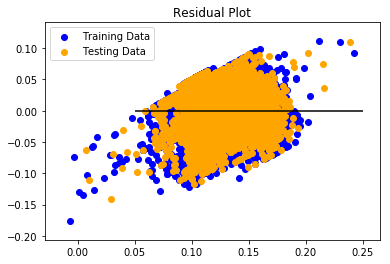

In [11]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")